In [1]:
import pandas as pd
import numpy as np
import seaborn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree

In [4]:
data = pd.read_csv('0422.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (80) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data1 = data[data['Matchweek'] != 1]

In [6]:
data2 = data1[data1['Matchweek'] != 2]

In [7]:
data = data2[data2['Matchweek'] != 3]

In [8]:
data

,Unnamed: 0,level_0,index,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint,Season,Matchweek,Home_code,Away_code,Venue_code
30,30,30,30,E0,28/08/04,Chelsea,Southampton,2,1,H,...,1.333333,0.000000,2.000000,3.000000,1.000000,2004,4,12,31,12
31,31,31,31,E0,28/08/04,Everton,West Brom,2,1,H,...,1.000000,2.500000,1.000000,1.500000,1.000000,2004,4,15,37,15
32,32,32,32,E0,28/08/04,Man City,Charlton,4,0,H,...,2.000000,1.333333,1.666667,0.333333,2.000000,2004,4,22,11,22
33,33,33,33,E0,28/08/04,Middlesbrough,Crystal Palace,2,1,H,...,0.666667,2.333333,2.000000,1.333333,0.333333,2004,4,24,13,24
34,34,34,34,E0,28/08/04,Norwich,Arsenal,1,4,A,...,4.000000,1.666667,1.333333,0.666667,3.000000,2004,4,26,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,6835,375,E0,22/05/2022,Crystal Palace,Man United,1,0,H,...,1.540541,1.243243,1.513514,1.145119,2.024890,2021,38,13,23,13
6836,6836,6836,376,E0,22/05/2022,Leicester,Southampton,4,1,H,...,1.135135,1.567568,1.702703,1.458746,1.218225,2021,38,20,31,20
6837,6837,6837,377,E0,22/05/2022,Liverpool,Wolves,3,1,H,...,1.000000,0.675676,1.081081,1.925329,1.188679,2021,38,21,40,21
6838,6838,6838,378,E0,22/05/2022,Man City,Aston Villa,3,2,H,...,1.351351,0.648649,1.378378,1.919473,1.195079,2021,38,22,1,22


In [9]:
data['pastHP-AP'] = data['pastHP']-data['pastAP']
data['pastHG-AG'] = data['pastHG']-data['pastAG']
data['pastAGC-HGC'] = data['pastAGC']-data['pastHGC']
data['pastHS-AS'] = data['pastHS']-data['pastAS']
data['pastASC-HSC'] = data['pastASC']-data['pastHSC']
data['pastHST-AST'] = data['pastHST']-data['pastAST']
data['pastASTC-HSTC'] = data['pastASTC']-data['pastHSTC']
data['GoalDiff'] = (data['HomeGoal']-data['AwayGoal'])
data['ConcededDiff'] = (data['AwayConceded']-data['HomeConceded'])
data['PointDiff'] = data['HomeFullPoint'] - data['AwayFullPoint']
data['EloDiff'] = data['HomeAvgPoint']-data['AwayAvgPoint']

C:\Users\Admin\AppData\Local\Temp/ipykernel_5820/1238161194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pastHP-AP'] = data['pastHP']-data['pastAP']
C:\Users\Admin\AppData\Local\Temp/ipykernel_5820/1238161194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pastHG-AG'] = data['pastHG']-data['pastAG']
C:\Users\Admin\AppData\Local\Temp/ipykernel_5820/1238161194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [20]:
def runKFold(l, m, n):
    X = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    eps=1e-9
    train_data_mean = np.mean(X, axis=0)
    train_data_std = np.std(X, axis=0)
    x = (X - train_data_mean) / (train_data_std + eps)
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    param_init = {
    "objective": 'multi:softmax',
    "reg_alpha" : 0,
    "booster": "gbtree",
    "max_depth": l, # default: 3 only for depthwise
    "n_estimators": m, # default: 500
    "learning_rate": n, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 1,  # default:  1.0
    "colsample_bylevel": 1, # default: 1.0
    "validate_parameters": 1,
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": -1, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
    xgb_model = xgb.XGBClassifier(**param_init)
    kfold = StratifiedKFold(n_splits=17)
    X = x[0:5950]
    Y = y[0:5950]
    results = cross_val_score(xgb_model, X, Y, cv=kfold)
    acc = results.mean()
    return acc

In [46]:
def runXGB(i, j, k, l, m, n):
    X = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    eps=1e-9
    train_data_mean = np.mean(X, axis=0)
    train_data_std = np.std(X, axis=0)
    x = (X - train_data_mean) / (train_data_std + eps)
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    y
    c = (i-2004)*350
    t = (j-4)*10
    q = k*10
    x_train = x[0:c]
    y_train = y[0:c]
    x_test = x[c+t:c+q]
    y_test = y[c+t:c+q]
    param_init = {
    "objective": 'multi:softmax',
    "reg_alpha" : 0,
    "booster": "gbtree",
    "max_depth": l, # default: 3 only for depthwise
    "n_estimators": m, # default: 500
    "learning_rate": n, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 1,  # default:  1.0
    "colsample_bylevel": 1, # default: 1.0
    "validate_parameters": 1,
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": -1, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
    xgb_model = xgb.XGBClassifier(**param_init)
    eval_set = [(x_train, y_train), (x_test, y_test)]
    clf_XGB = xgb_model.fit(x_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, early_stopping_rounds=10, verbose=True)
    predictions = xgb_model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results = xgb_model.evals_result()
    logloss = results['validation_1']['mlogloss'][-1]
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    class_names=[0, 1, 2]
    return accuracy, logloss
    

[14:03:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-merror:0.43059	validation_0-mlogloss:1.07253	validation_1-merror:0.49143	validation_1-mlogloss:1.08071
[1]	validation_0-merror:0.41445	validation_0-mlogloss:1.04978	validation_1-merror:0.48857	validation_1-mlogloss:1.06343
[2]	validation_0-merror:0.41042	validation_0-mlogloss:1.02969	validation_1-merror:0.48571	validation_1-mlogloss:1.05153
[3]	validation_0-merror:0.40739	validation_0-mlogloss:1.01087	validation_1-merror:0.48000	validation_1-mlogloss:1.04055
[4]	validation_0-merror:0.40706	validation_0-mlogloss:0.99592	validation_1-merror:0.47429	validation_1-mlogloss:1.03078


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-merror:0.40622	validation_0-mlogloss:0.98180	validation_1-merror:0.47429	validation_1-mlogloss:1.02278
[6]	validation_0-merror:0.40555	validation_0-mlogloss:0.96821	validation_1-merror:0.48000	validation_1-mlogloss:1.01555
[7]	validation_0-merror:0.40319	validation_0-mlogloss:0.95584	validation_1-merror:0.46857	validation_1-mlogloss:1.00927
[8]	validation_0-merror:0.40101	validation_0-mlogloss:0.94460	validation_1-merror:0.46286	validation_1-mlogloss:1.00330
[9]	validation_0-merror:0.39664	validation_0-mlogloss:0.93434	validation_1-merror:0.46286	validation_1-mlogloss:1.00026
[10]	validation_0-merror:0.39597	validation_0-mlogloss:0.92536	validation_1-merror:0.47143	validation_1-mlogloss:0.99495
[11]	validation_0-merror:0.39261	validation_0-mlogloss:0.91673	validation_1-merror:0.46286	validation_1-mlogloss:0.99252
[12]	validation_0-merror:0.39277	validation_0-mlogloss:0.90979	validation_1-merror:0.46571	validation_1-mlogloss:0.99085
[13]	validation_0-merror:0.39294	vali

(0.5342857142857143, 0.987573738523892)

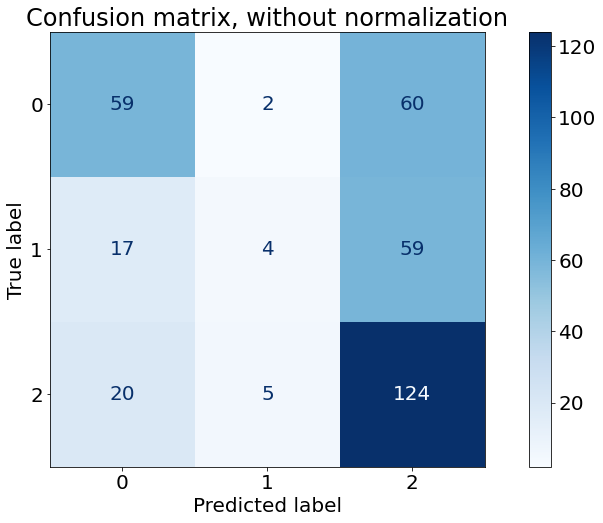

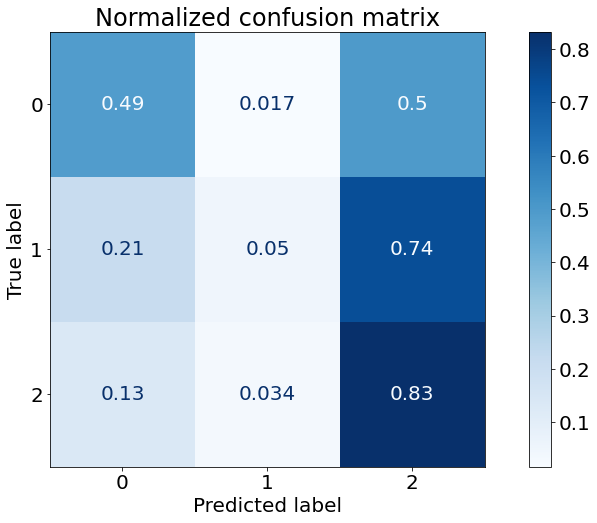

In [38]:
runXGB(2021, 4, 38, 6, 15, 0.1)

In [42]:
def CrossValPLT(a, b, c, d, i, j, k, l):
    val_50_1_1 = runKFold(a, i, 0.1)
    val_50_1_2 = runKFold(a, i, 0.1)
    val_50_1_3 = runKFold(a, i, 0.1)
    val_50_1_4 = runKFold(a, i, 0.1)
    val_50_2_1 = runKFold(b, j, 0.1)
    val_50_2_2 = runKFold(b, j, 0.1)
    val_50_2_3 = runKFold(b, j, 0.1)
    val_50_2_4 = runKFold(b, j, 0.1)
    val_50_3_1 = runKFold(c, k, 0.1)
    val_50_3_2 = runKFold(c, k, 0.1)
    val_50_3_3 = runKFold(c, k, 0.1)
    val_50_3_4 = runKFold(c, k, 0.1)
    val_50_4_1 = runKFold(d, l, 0.1)
    val_50_4_2 = runKFold(d, l, 0.1)
    val_50_4_3 = runKFold(d, l, 0.1)
    val_50_4_4 = runKFold(d, l, 0.1)
    objects = ('max depth=a', 'max depth=b', 'max depth=c', 'max depth=d')
    y_pos = np.arange(len(objects))
    plt.rcParams['figure.figsize'] = [32, 8]
    plt.rcParams['font.size'] = '20'
    xgb1 = [val_50_1_1, val_50_2_1, val_50_3_1, val_50_4_1]
    xgb2 = [val_50_1_2, val_50_2_2, val_50_3_2, val_50_4_2]
    xgb3 = [val_50_1_3, val_50_2_3, val_50_3_3, val_50_4_3]
    xgb4 = [val_50_1_4, val_50_2_4, val_50_3_4, val_50_4_4]
    for index, value in enumerate(xgb15):
        plt.text(index - 0.44, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    for index, value in enumerate(xgb20):
        plt.text(index - 0.2, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    for index, value in enumerate(xgb25):
        plt.text(index + 0.04, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    for index, value in enumerate(xgb30):
        plt.text(index + 0.28, value + 0.01, str("{:.3f}".format(value)), fontsize=20)
    bars_sigmoid = plt.bar(y_pos - 0.36, xgb1, 0.24, label = 'n_estimator=i', color = 'red')
    plt.bar(y_pos - 0.12, xgb2, 0.24, label = 'n_estimator=j', color = 'orange')
    bars_linear = plt.bar(y_pos + 0.12, xgb3, 0.24, label = 'n_estimator=k', color = 'yellow')
    bars_xyz = plt.bar(y_pos + 0.36, xgb4, 0.24, label = 'n_estimator=l', color = 'brown')
    plt.xticks(y_pos, objects)
    plt.ylim([0, 1.1])
    plt.ylabel("Tuning hyparameters")
    plt.xlabel("Number of max depth in model")
    patterns = ("o", "o", "o", "o")
    for i, x in zip(bars_sigmoid,patterns):
        i.set_hatch(x)
    patterns = ("\\", "\\", "\\", "\\")
    for i, x in zip(bars_linear,patterns):
        i.set_hatch(x)
    patterns = ("x", "x", "x", "x")
    for i, x in zip(bars_xyz,patterns):
        i.set_hatch(x)
    plt.legend(fontsize = 20)


In [47]:
def AccPLT(a, b, c, i, j, k):
    accuary_50_1_1 = runXGB(2021, 4, 38, a, i, 0.1)[0]
    accuary_50_1_2 = runXGB(2021, 4, 38, a, j, 0.1)[0]
    accuary_50_1_3 = runXGB(2021, 4, 38, a, k, 0.1)[0]


    accuary_50_2_1 = runXGB(2021, 4, 38, b, i, 0.1)[0]
    accuary_50_2_2 = runXGB(2021, 4, 38, b, j, 0.1)[0]
    accuary_50_2_3 = runXGB(2021, 4, 38, b, k, 0.1)[0]


    accuary_50_3_1 = runXGB(2021, 4, 38, c, i, 0.1)[0]
    accuary_50_3_2 = runXGB(2021, 4, 38, c, j, 0.1)[0]
    accuary_50_3_3 = runXGB(2021, 4, 38, c, k, 0.1)[0]


    objects = ('max depth=a', 'max depth=b', 'max depth=c')
    y_pos = np.arange(len(objects))
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = '20'

    xgb1 = [accuary_50_1_1, accuary_50_2_1, accuary_50_3_1]
    xgb2 = [accuary_50_1_2, accuary_50_2_2, accuary_50_3_2]
    xgb3 = [accuary_50_1_3, accuary_50_2_3, accuary_50_3_3]

    for index, value in enumerate(xgb3):
        plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb4):
        plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb6):
        plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    # for index, value in enumerate(min_rewardVSs):
    #     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
    #plt.bar(y_pos, performance, align='center', alpha=0.5)
    bars_sigmoid = plt.bar(y_pos - 0.24, xgb3, 0.24, label = 'n_estimator=i', color = 'magenta')
    plt.bar(y_pos, xgb4, 0.24, label = 'n_estimator=j', color = 'orange')
    bars_linear = plt.bar(y_pos + 0.24, xgb6, 0.24, label = 'n_estimator=k', color = 'teal')
    #plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
    plt.xticks(y_pos, objects)
    plt.ylim([0, 1.4])
    plt.ylabel("Accuracy of 2021-2022 all season prediction")
    plt.xlabel("Number of max depth in model")
    patterns = ("o", "o", "o")
    for i, x in zip(bars_sigmoid,patterns):
        i.set_hatch(x)
    patterns = ("\\", "\\", "\\")
    for i, x in zip(bars_linear,patterns):
        i.set_hatch(x)
    plt.legend(fontsize = 20)
    #plt.margins(0.1,0)


In [ ]:
def LoglossPLT(a, b, c, i, j, k):
    accuary_50_1_1 = runXGB(2021, 4, 38, a, i, 0.1)[1]
    accuary_50_1_2 = runXGB(2021, 4, 38, a, j, 0.1)[1]
    accuary_50_1_3 = runXGB(2021, 4, 38, a, k, 0.1)[1]


    accuary_50_2_1 = runXGB(2021, 4, 38, b, i, 0.1)[1]
    accuary_50_2_2 = runXGB(2021, 4, 38, b, j, 0.1)[1]
    accuary_50_2_3 = runXGB(2021, 4, 38, b, k, 0.1)[1]


    accuary_50_3_1 = runXGB(2021, 4, 38, c, i, 0.1)[1]
    accuary_50_3_2 = runXGB(2021, 4, 38, c, j, 0.1)[1]
    accuary_50_3_3 = runXGB(2021, 4, 38, c, k, 0.1)[1]


    objects = ('max depth=a', 'max depth=b', 'max depth=c')
    y_pos = np.arange(len(objects))
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = '20'

    xgb1 = [accuary_50_1_1, accuary_50_2_1, accuary_50_3_1]
    xgb2 = [accuary_50_1_2, accuary_50_2_2, accuary_50_3_2]
    xgb3 = [accuary_50_1_3, accuary_50_2_3, accuary_50_3_3]

    for index, value in enumerate(xgb3):
        plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb4):
        plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    for index, value in enumerate(xgb6):
        plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
    # for index, value in enumerate(min_rewardVSs):
    #     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
    #plt.bar(y_pos, performance, align='center', alpha=0.5)
    bars_sigmoid = plt.bar(y_pos - 0.24, xgb3, 0.24, label = 'n_estimator=i', color = 'magenta')
    plt.bar(y_pos, xgb4, 0.24, label = 'n_estimator=j', color = 'orange')
    bars_linear = plt.bar(y_pos + 0.24, xgb6, 0.24, label = 'n_estimator=k', color = 'teal')
    #plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
    plt.xticks(y_pos, objects)
    plt.ylim([0, 1.4])
    plt.ylabel("Logloss of 2021-2022 all season prediction")
    plt.xlabel("Number of max depth in model")
    patterns = ("o", "o", "o")
    for i, x in zip(bars_sigmoid,patterns):
        i.set_hatch(x)
    patterns = ("\\", "\\", "\\")
    for i, x in zip(bars_linear,patterns):
        i.set_hatch(x)
    plt.legend(fontsize = 20)
    #plt.margins(0.1,0)


In [3]:
a = 100

In [4]:
str(a)

'100'